![Banner](./img/AI_Special_Program_Banner.jpg)


# Solution to the exercise artificial neural networks
---

### Sign Language MNIST
In this exercise, you will repeat and extend the training part of the notebook used in the teaching material by replacing the MNIST dataset with [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist). The main goal is to experiment with the MLP parameters and, most importantly, to ***evaluate*** the respective results.
* $n_h$: Number of hidden layers,
* $m_j,\>j=1,\dots,n_h$: Number of neurons in the $j$-th hidden layer,
* and other hyperparameters that have an influence on performance and training time.

After this exercise, you should have an overview of some of the most important hyperparameters for artificial neural networks and how they control the behavior of these models.

# Classification of sign language

The sign language MNIST dataset is intended as a replacement for MNIST. It also consists of images with $28 \times 28$ pixels, where each pixel is represented by a grayscale value. Therefore, we have $28 \times28=784$ *attributes* per line, so that the images are then *unrolled* into vectors of length $784$ and each is given a *class label* of $0-26$ in both the training data and the test data, corresponding to the type of sign it represents.

![American Sign Language](./img/american_sign_language.PNG "American Sign Language")

**Note**: The character for *J* and for *Z* requires a movement of the hand and can not be expressed in an image alone. Therefore, *J* and *Z* are not present in the data set. This means that the class labels **9** and **25** are not assigned!

## Read in the data record

The sign language MNIST dataset is publicly available on [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist), but we will use a subset of the data for this exercise. You can find the data in the `data` folder as a `.csv` file. We can prepare the data to match the structure of MNIST shown in the teaching material by loading it as a `pandas` data frame and transforming it into a `numpy` array:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, PredefinedSplit
%matplotlib inline
from sklearn.neural_network import MLPClassifier
import datetime as dt

In [2]:
path = 'data/sign-language-mnist_m.csv'

In [3]:
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20919,0,171,173,175,179,180,181,183,184,185,...,231,231,231,231,231,232,231,230,230,230
22136,0,143,145,147,151,153,154,156,156,158,...,207,208,208,208,208,209,207,207,207,207
3263,0,174,176,176,175,177,177,178,178,177,...,212,204,204,203,203,203,202,205,203,201
2888,0,165,167,168,168,169,170,172,170,168,...,195,194,193,193,191,190,188,184,182,181
18977,0,180,180,181,183,183,183,182,183,183,...,207,205,205,205,204,202,200,198,197,195


As you can see, the images consist of 784 pixel values between 0 and 255. In contrast to tree-based models, it is very important to *normalize* the input features when using an artificial neural network. This generally makes the training process more stable and enables faster training times and earlier convergence.
> "Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1." ([Jason Brownlee](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/))

We can normalize the features and extract the feature matrix in one step:

In [5]:
X = np.array(df.drop('label', axis=1))/255
y = np.array(df['label'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [7]:
print('Train Data: rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Train Data: rows: 5760, columns: 784


In [8]:
print('Test Data: rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Test Data: rows: 1440, columns: 784


In addition, we want to have a **mapping** so that we can work with the letters when analyzing. You can use the following dictionary:

In [9]:
label_letter_map = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F',
                    6 : 'G', 7 : 'H', 8 : 'I', 10 : 'K', 11 : 'L', 12 : 'M',
                    13 : 'N', 14 : 'O', 15 : 'P', 16 : 'Q', 17 : 'R', 18 : 'S',
                    19 : 'T', 20 : 'U', 21 : 'V', 22 : 'W', 23 : 'X', 24 : 'Y'}

<h2 style="color:blue">Task 1: Visualize the fifth picture of each class and the corresponding letter</h2>

**Note:** Remember that labels 9 and 25 are missing. To replicate the code shown in the tutorial, you will need two separate indices in your `for loop`. One for the labels and one for the axis. [Enumerate](https://docs.python.org/3/library/functions.html#enumerate) might come in handy... Also, specify which *letter* is represented!

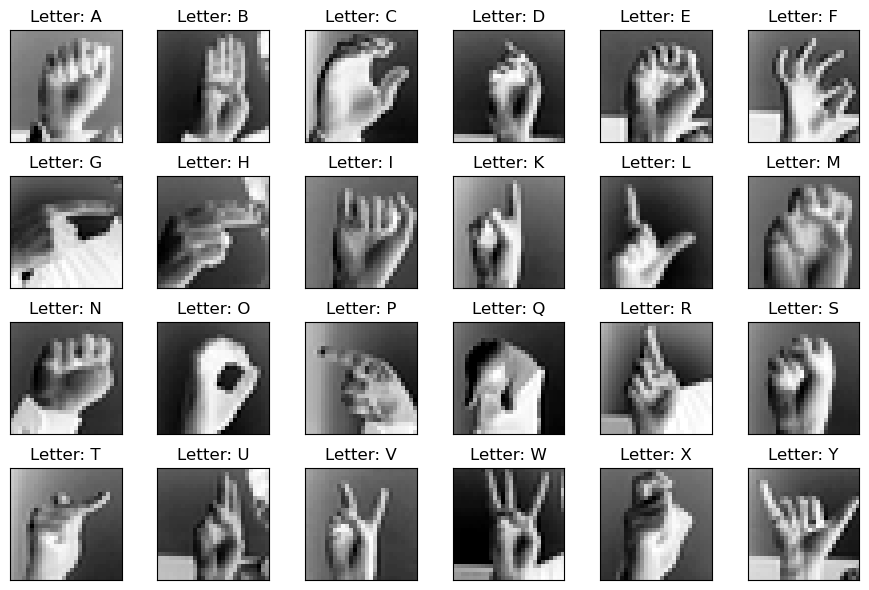

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=6, sharex=True, sharey=True, figsize=(9, 6))
ax = ax.flatten()
for i,x in enumerate(np.unique(y)):
    ax[i].imshow(X_train[y_train == x][5].reshape(28,28), cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'Letter: {label_letter_map[x]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/sign_mnist_all.png', dpi=300)
plt.show()

<h2 style="color:blue">Task 2: Visualize 25 different versions of the character for the letter L</h2>

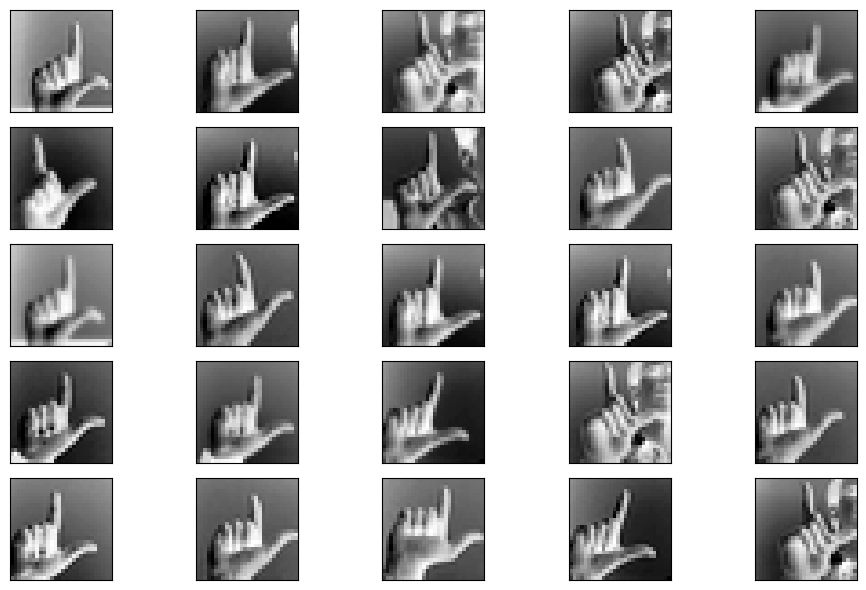

In [11]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10, 6))
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 11][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/sign_mnist_l.png', dpi=300)
plt.show()

<h2 style="color:blue">Task 3: Classification with a multilayer perceptron</h2>

This task is about **experimenting** and **evaluating** your results! Use the `MLPClassifier` of `scikit-learn` to train different models with
* different number of hidden layers
* different number of neurons in the hidden layers
* different hyperparameters (see info below).

Try to record for each variant:

* how *long* it took to train the network
* how many epochs were necessary
* how the loss values developed over the epochs
* the accuracy
  + on the training data
  + on the test data
  
What is your **interpretation** of these experiments?

In practice, working with neural networks can be a very delicate process. These models are highly dependent on various [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and can be quite volatile. Be careful when setting the hyperparameters and do not change too many things at once.

Jason Brownlee gives a very thorough [overview](https://machinelearningmastery.com/improve-deep-learning-performance/) of different methods that can be used to improve neural networks. Not all methods are relevant here, but the section on *Algorithm Tuning* is particularly applicable in our context and worth a read. Here is a **selection of hyperparameters** that you can try out:

* **Size/complexity** of the model: reducing the number of layers and neurons will result in a less complex model and therefore faster training times. However, if the model is too simple, it may not be able to fit the data at hand, resulting in low accuracy.
* **Learning rate**: Higher learning rates reduce the convergence time of the model, but can lead to suboptimal weight updates towards the end of the learning process, which can lead to an increased bias of the model.
* **Maximum number of iterations**: This parameter allows you to force an early termination of the learning process. This is actually a good strategy to prevent overfitting, but if you stop too early, the model may not yet fit the data. Don't be afraid to try really low values!
* **Batchsize**: Larger batchsize means that fewer gradient updates are calculated, but calculating the gradient is more computationally intensive. So there is an inherent trade-off in batch size. Not only that, but different batch sizes also have an impact on model performance. Increasing the batch size may result in a solution that is closer to the true global minimum, which may actually be undesirable as the model loses its ability to generalize. On the other hand, decreasing the batch size may cause the model to get stuck at a bad local minimum early in the training process. For more information, see [Goodfellow-et-al-2016](http://www.deeplearningbook.org/contents/optimization.html).
* **Activation function**: As you know from the teaching material, there are a lot of different activation functions you can try. The *logistic function* (*sigmoid*) can sometimes be quite slow and also cause the [vanishing gradient problem](http://neuralnetworksanddeeplearning.com/chap5.html#the_vanishing_gradient_problem). It might therefore be useful to use a more modern function, such as *ReLU*.
* **Solver**: The *solver* or *optimizer* is the algorithm that updates the weights and biases (also known as the learnable parameters) of the network. *SGD* is a very robust solver with some good features, but it can be quite slow. Therefore, using a more modern solver, such as *Adam*, can speed up the training process. Jason Brownlee gives an overview in his [blog post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

So there are many hyperparameters, but what is a good starting point? This question is not trivial to answer and is still an open research discussion. For the **start** of your training journey, you can use the *default setting* as shown in the educational material. Additionally, you can initially change the *number of hidden layers*, but keep the *total number of neurons* constant. From there, you can evaluate the results and proceed with the hyperparameter tuning instructions given above.

Also, after some testing, you can incorporate more modern "standards" into your model, as explained by [Jason Brownlee](https://machinelearningmastery.com/improve-deep-learning-performance/). The easiest ones to change are:
* *Adam* as optimizer
* *ReLu* as activation function

Can you achieve a **test accuracy of over 99%**?

### Initial setting

We will first try to find out which *number of hidden layers* makes sense. To do this, we will use a total number of 100 neurons and distribute these over 2, 3 and 4 layers, whereby we will also try out different distributions for 3 layers.

Starting variant 0 to train the neural network at 2024-01-09 13:02:03.059140


/home/dschaudt/miniconda3/envs/aicoss12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Starting variant 1 to train the neural network at 2024-01-09 13:04:54.049593
Starting variant 2 to train the neural network at 2024-01-09 13:04:58.829872
Starting variant 3 to train the neural network at 2024-01-09 13:05:02.912391


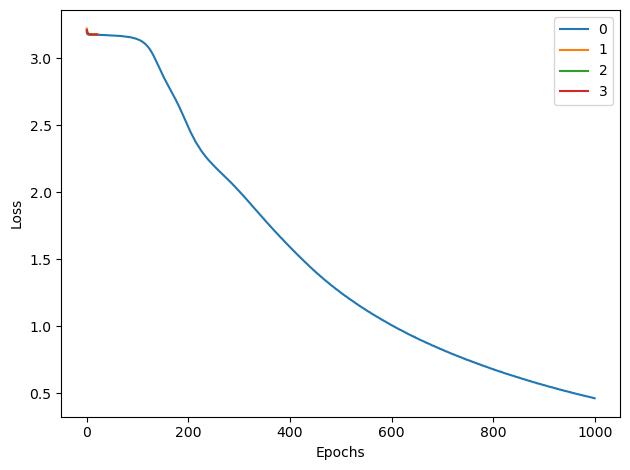

Done at 2024-01-09 13:05:07.759702


In [12]:
variants = [(50,50),(50,30,20),(30,40,30),(30,30,20,20)]
results = []

for i in range(0,4):
    nn = MLPClassifier(hidden_layer_sizes=variants[i],
                       activation='logistic',
                       solver='sgd',
                       alpha=0.001,
                       batch_size=50,
                       learning_rate='constant',
#                   learning_rate='invscaling',
                       learning_rate_init=0.001,
#                   power_t=0.00001,
                       max_iter=1000,
#                       verbose=True,
                       random_state=1)
# training
    start = dt.datetime.now()
    print('Starting variant {} to train the neural network at {}'.format(i,start))
    nn.fit(X_train, y_train)
    end = dt.datetime.now()
    time_needed = end-start
    epochs_needed = nn.n_iter_
# plot

    loss_values = nn.loss_curve_

    plt.plot(range(len(loss_values)), loss_values, label=str(i))
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.tight_layout()
#     plt.savefig('./figures/cost'+str(i)+'.png', dpi=300)

# accuracies
    y_train_pred = nn.predict(X_train)
    acc_train = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
    y_test_pred = nn.predict(X_test)
    acc_test = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
    results.append([variants[i],time_needed,epochs_needed,acc_train,acc_test])

plt.legend(loc='upper right')
plt.show()
print('Done at {}'.format(end))

In [13]:
results

[[(50, 50),
  datetime.timedelta(seconds=170, microseconds=862909),
  1000,
  0.8975694444444444,
  0.8555555555555555],
 [(50, 30, 20),
  datetime.timedelta(seconds=4, microseconds=728051),
  22,
  0.04079861111111111,
  0.04097222222222222],
 [(30, 40, 30),
  datetime.timedelta(seconds=4, microseconds=18532),
  19,
  0.041666666666666664,
  0.041666666666666664],
 [(30, 30, 20, 20),
  datetime.timedelta(seconds=4, microseconds=847311),
  22,
  0.041666666666666664,
  0.041666666666666664]]

In [14]:
resdf = pd.DataFrame.from_records(results, columns=['variant','time','epochs','acc_train','acc_test'])
resdf

,variant,time,epochs,acc_train,acc_test
0,"(50, 50)",0 days 00:02:50.862909,1000,0.897569,0.855556
1,"(50, 30, 20)",0 days 00:00:04.728051,22,0.040799,0.040972
2,"(30, 40, 30)",0 days 00:00:04.018532,19,0.041667,0.041667
3,"(30, 30, 20, 20)",0 days 00:00:04.847311,22,0.041667,0.041667


#### Interpretation

With this setting we already got decent results for the (50,50) architecture, but it took a very long time and the algorithm did not converge even after 1000 epochs. Scikit-learn even gives us a **warning** that the algorithm could still improve. It seems that the other variants with 3 and 4 layers are unsuitable. Their accuracy is pretty much the null-accuracy of this problem (~4.16%).

### First iteration - adjustment of the learning rate

For the next iteration of improvements, we could train with even more epochs to improve the first model, but that would increase the training time. We should rather use a *higher learning rate* to speed up the training. Increasing the learning rate by a factor of 10 results in:

Starting variant 0 to train the neural network at 2024-01-09 13:05:08.002314
Starting variant 1 to train the neural network at 2024-01-09 13:06:21.414000
Starting variant 2 to train the neural network at 2024-01-09 13:07:52.559902
Starting variant 3 to train the neural network at 2024-01-09 13:08:24.180366


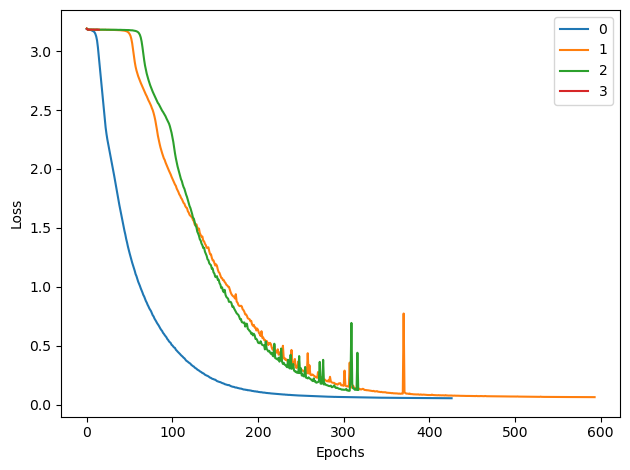

Done at 2024-01-09 13:08:25.779271


In [15]:
variants = [(50,50),(50,30,20),(30,40,30),(30,30,20,20)]
results = []

for i in range(0,4):
    nn = MLPClassifier(hidden_layer_sizes=variants[i],
                       activation='logistic',
                       solver='sgd',
                       alpha=0.001,
                       batch_size=50,
                       learning_rate='constant',
#                   learning_rate='invscaling',
                       learning_rate_init=0.01,
#                   power_t=0.00001,
                       max_iter=1000,
#                       verbose=True,
                       random_state=1)
# training
    start = dt.datetime.now()
    print('Starting variant {} to train the neural network at {}'.format(i,start))
    nn.fit(X_train, y_train)
    end = dt.datetime.now()
    time_needed = end-start
    epochs_needed = nn.n_iter_
# plot

    loss_values = nn.loss_curve_

    plt.plot(range(len(loss_values)), loss_values, label=str(i))
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.tight_layout()
#     plt.savefig('./figures/cost'+str(i)+'.png', dpi=300)

# accuracies
    y_train_pred = nn.predict(X_train)
    acc_train = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
    y_test_pred = nn.predict(X_test)
    acc_test = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
    results.append([variants[i],time_needed,epochs_needed,acc_train,acc_test])

plt.legend(loc='upper right')
plt.show()
print('Done at {}'.format(end))

In [16]:
resdf = pd.DataFrame.from_records(results, columns=['variant','time','epochs','acc_train','acc_test'])
resdf

,variant,time,epochs,acc_train,acc_test
0,"(50, 50)",0 days 00:01:13.322085,427,1.000000,0.998611
1,"(50, 30, 20)",0 days 00:01:31.097397,594,0.999306,0.995833
2,"(30, 40, 30)",0 days 00:00:31.579554,318,0.992361,0.969444
3,"(30, 30, 20, 20)",0 days 00:00:01.598905,15,0.041667,0.041667


#### Interpretation

This is interesting! By adjusting the learning rate, not only did the first model improve a lot, but also models 2 and 3. It seems that the learning rate in the first setup was too low to even find a direction for the gradient for models 2 and 3. The graph still shows a gap in convergence time between model 1 and models 2 and 3, as model 1 has a lower loss much earlier in training.

Models 1-3 thus provide almost perfect accuracy and probably cannot be improved further. But for experimentation and curiosity, we can look at some other hyperparameters that could reduce the training times even further.

### Second iteration - increasing the model complexity

Let's check whether increasing the model size (and thus the complexity) could improve the convergence time and thus reduce the training time. We will increase all neurons by a factor of 2 and leave the learning rate at 0.01:

Starting variant 0 to train the neural network at 2024-01-09 13:08:26.035186
Starting variant 1 to train the neural network at 2024-01-09 13:09:59.266591
Starting variant 2 to train the neural network at 2024-01-09 13:11:52.679597
Starting variant 3 to train the neural network at 2024-01-09 13:12:59.535965


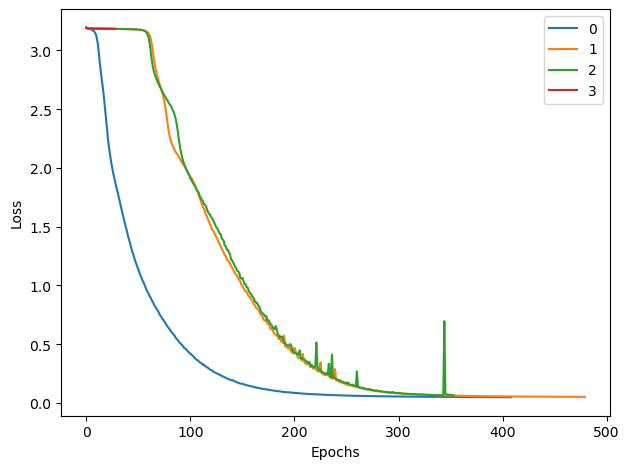

Done at 2024-01-09 13:13:05.250337


In [17]:
variants = [(100,100),(100,60,40),(60,80,60),(60,60,40,40)]
results = []

for i in range(0,4):
    nn = MLPClassifier(hidden_layer_sizes=variants[i],
                       activation='logistic',
                       solver='sgd',
                       alpha=0.001,
                       batch_size=50,
                       learning_rate='constant',
#                   learning_rate='invscaling',
                       learning_rate_init=0.01,
#                   power_t=0.00001,
                       max_iter=1000,
#                       verbose=True,
                       random_state=1)
# training
    start = dt.datetime.now()
    print('Starting variant {} to train the neural network at {}'.format(i,start))
    nn.fit(X_train, y_train)
    end = dt.datetime.now()
    time_needed = end-start
    epochs_needed = nn.n_iter_
# plot

    loss_values = nn.loss_curve_

    plt.plot(range(len(loss_values)), loss_values, label=str(i))
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.tight_layout()
#     plt.savefig('./figures/cost'+str(i)+'.png', dpi=300)

# accuracies
    y_train_pred = nn.predict(X_train)
    acc_train = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
    y_test_pred = nn.predict(X_test)
    acc_test = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
    results.append([variants[i],time_needed,epochs_needed,acc_train,acc_test])

plt.legend(loc='upper right')
plt.show()
print('Done at {}'.format(end))

In [18]:
resdf = pd.DataFrame.from_records(results, columns=['variant','time','epochs','acc_train','acc_test'])
resdf

,variant,time,epochs,acc_train,acc_test
0,"(100, 100)",0 days 00:01:33.115206,409,1.000000,1.000000
1,"(100, 60, 40)",0 days 00:01:53.347031,480,1.000000,0.994444
2,"(60, 80, 60)",0 days 00:01:06.791312,354,0.999479,0.989583
3,"(60, 60, 40, 40)",0 days 00:00:05.714372,29,0.041667,0.041667


#### Interpretation

Well, that didn't exactly have the desired result. Although the increase in complexity reduced the epochs for models 1 and 2, the training time also increased. Accuracy also improved across the board; for Model 1 even to a perfect 1.0 test accuracy! Unfortunately, Model 4 seems to be beyond saving at this point...

### Third iteration - application of current "standards"

If we look at our model, some of the hyperparameters are "outdated" and are no longer commonly used. We can therefore change them to a more modern variant that is (mostly) agreed upon and works quite well in many scenarios. The easiest ones to change are:
* Adam as optimizer
* ReLu as activation function

Since both ReLu and Adam favor faster convergence times, we can try them out on the more complex models from iteration 3 onwards:

Starting variant 0 to train the neural network at 2024-01-09 13:13:05.489066
Starting variant 1 to train the neural network at 2024-01-09 13:13:22.851560
Starting variant 2 to train the neural network at 2024-01-09 13:13:54.145367
Starting variant 3 to train the neural network at 2024-01-09 13:14:14.739590


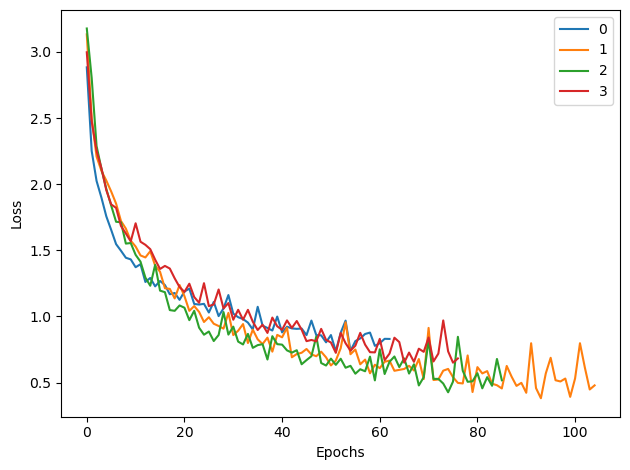

Done at 2024-01-09 13:14:33.516118


In [19]:
variants = [(100,100),(100,60,40),(60,80,60),(60,60,40,40)]
results = []

for i in range(0,4):
    nn = MLPClassifier(hidden_layer_sizes=variants[i],
                       activation='relu',
                       solver='adam',
                       alpha=0.001,
                       batch_size=50,
#                       learning_rate='constant',
#                   learning_rate='invscaling',
                       learning_rate_init=0.01,
#                   power_t=0.00001,
                       max_iter=1000,
#                       verbose=True,
                       random_state=1)
# training
    start = dt.datetime.now()
    print('Starting variant {} to train the neural network at {}'.format(i,start))
    nn.fit(X_train, y_train)
    end = dt.datetime.now()
    time_needed = end-start
    epochs_needed = nn.n_iter_
# plot

    loss_values = nn.loss_curve_

    plt.plot(range(len(loss_values)), loss_values, label=str(i))
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.tight_layout()
#     plt.savefig('./figures/cost'+str(i)+'.png', dpi=300)

# accuracies
    y_train_pred = nn.predict(X_train)
    acc_train = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
    y_test_pred = nn.predict(X_test)
    acc_test = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
    results.append([variants[i],time_needed,epochs_needed,acc_train,acc_test])

plt.legend(loc='upper right')
plt.show()
print('Done at {}'.format(end))

In [20]:
resdf = pd.DataFrame.from_records(results, columns=['variant','time','epochs','acc_train','acc_test'])
resdf

,variant,time,epochs,acc_train,acc_test
0,"(100, 100)",0 days 00:00:17.275855,63,0.750694,0.674306
1,"(100, 60, 40)",0 days 00:00:31.241646,105,0.797396,0.754861
2,"(60, 80, 60)",0 days 00:00:20.548230,86,0.617188,0.588889
3,"(60, 60, 40, 40)",0 days 00:00:18.776528,77,0.762153,0.704167


#### Interpretation

And again we were surprised! Changing these two hyperparameters had a big effect on our models. *First*: The performance for our established models dropped significantly (even for our "stable" model 1!). *Second*: Convergence time actually went down a lot, which improved training time. *Third*: Model 4 does indeed find a fit on the data after all.

It seems that the state-of-the-art parameters do not work "out-of-the-box" for our use case. Further investigation is needed here. For example, since the training time is much faster, we could increase the model complexity to see if we can improve the situation again. And so the loop continues...

### Fourth iteration - automation please...

At this point, it seems clear that tuning neural networks requires a lot of experimentation. So why not automate the process? We already know the approach with *Grid Search*. Since GridSearch is an exhaustive search and training times for neural networks can be quite long, let's try a different approach: *Random Search*.

In contrast to Grid Search, not all parameter values are tried, but a fixed number of parameter settings are sampled from the given distributions. This allows the search times to be controlled.

To use our established train/test split in sklearn `RandomizedSearchCV`, we need to define our split as `PredefinedSplit`:

In [21]:
X_sort = np.concatenate([X_train, X_test])
y_sort = np.concatenate([y_train, y_test])

In [22]:
test_fold = np.concatenate([
    # The training data.
    np.full(X_train.shape[1],-1, dtype=np.int8),
    # The test data.
    np.zeros(X_test.shape[1], dtype=np.int8)
])
cv = PredefinedSplit(test_fold)

In [23]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from time import time


# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {'hidden_layer_sizes' : [(100,100),(100,60,40),(60,80,60),(60,60,40,40)],
              'activation': ['logistic', 'relu'],
              'solver' : ['sgd', 'adam'],
              'learning_rate_init' : stats.uniform(0.001, 0.07),
              'batch_size' : stats.randint(25,75)}


nn = MLPClassifier(alpha=0.001, max_iter=1000, random_state=1)

n_iter_search = 50
random_search = RandomizedSearchCV(nn, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=cv)

start = time()
random_search.fit(X_sort, y_sort)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 174.52 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.755 (std: 0.000)
Parameters: {'activation': 'logistic', 'batch_size': 58, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.05899018508462954, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.742 (std: 0.000)
Parameters: {'activation': 'logistic', 'batch_size': 27, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.012131382577020875, 'solver': 'sgd'}

Model with rank: 3
Mean validation score: 0.739 (std: 0.000)
Parameters: {'activation': 'relu', 'batch_size': 36, 'hidden_layer_sizes': (60, 80, 60), 'learning_rate_init': 0.0014384156742346269, 'solver': 'adam'}

Model with rank: 4
Mean validation score: 0.693 (std: 0.000)
Parameters: {'activation': 'logistic', 'batch_size': 71, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.02066163078297315, 'solver': 'sgd'}

Model with rank: 5
Mean validation score: 0.685 (std: 0.000)
Paramete

#### Interpretation

It seems that the random search approach cannot keep up with our hand-tuned models in terms of accuracy. Interestingly, all the best models found have 2 layers, which is congruent with our findings. Also interesting: The best model combines ReLu with SGD - we haven't tried that yet.

The way to search this *hyperparameter space* to find the best parameters is an active area of research. There are many different methods to tackle this optimization problem. Some of the best known are:
* [Neural Architecture Search](https://arxiv.org/abs/1808.05377) - Specialized neural networks that search the hyperparameter space to tune another neural network.
* [Bayesian Optimization Methods](https://arxiv.org/abs/1806.09055) - Formulates the hyperparameter space as differentiable and uses gradient descent to find best hyperparameters.
* [Evolutionary Algorithm Approaches](https://arxiv.org/abs/1802.01548) - Uses EAs to extract the best hyperparameters from a population of neural networks.

This list is by no means exhaustive and is only intended to give an indication of the different directions that exist. Ultimately, the experiments we conducted in this notebook should give you some insight into the depth of this problem.

<h2 style="color:blue">Task 4: Use your best model and visualize 20 misclassifications...</h2>

... and give your opinion. Use the **mapping** to make your interpretation easier!

**Note**: If your model has reached a test accuracy of 100%, you can no longer complete this task. This means that you are finished here! However, you may want to use a weaker model for the sake of interest...

Since it would be pointless to use the model with test accuracy 1.0, we will analyze the best model with the "modern" settings:

In [24]:
nn = MLPClassifier(hidden_layer_sizes=(60,80,60),
                       activation='relu',
                       solver='adam',
                       alpha=0.001,
                       batch_size=50,
                       learning_rate='constant',
#                   learning_rate='invscaling',
                       learning_rate_init=0.01,
#                   power_t=0.00001,
                       max_iter=1000,
#                       verbose=True,
                       random_state=1)
nn.fit(X_train, y_train)
y_test_pred = nn.predict(X_test)

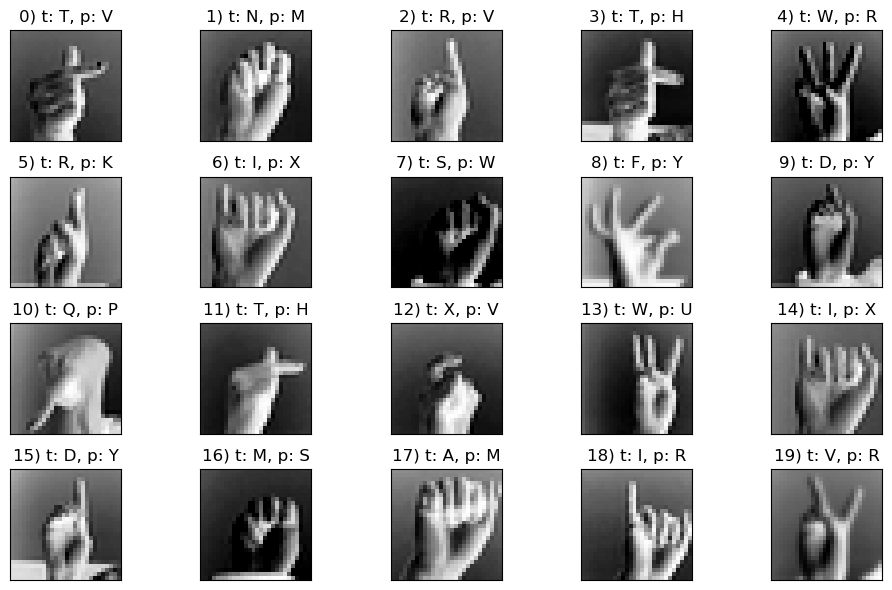

In [25]:
miscl_img = X_test[y_test != y_test_pred][:20]
correct_lab = y_test[y_test != y_test_pred][:20]
miscl_lab= y_test_pred[y_test != y_test_pred][:20]

fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(10,6))
ax = ax.flatten()
for i in range(20):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i}) t: {label_letter_map[correct_lab[i]]}, p: {label_letter_map[miscl_lab[i]]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/sign_mnist_miscl.png', dpi=300)
plt.show()

Most of these misclassifications are quite difficult to judge without a better understanding of sign language itself. It seems as if the model is making errors across all letters and not struggling with any particular letter. Most of these shapes look quite similar and are therefore forgivable as errors (especially images 1, 14, 17 and 18). Images 7 and 16 suffer from poor lighting and are difficult to make out even for humans.